<a href="https://colab.research.google.com/github/HebaRouk/-Customer-Churn-Prediction-Project/blob/main/Saiket_ML_Internship_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Customer Churn Prediction Project  
### Internship Program - Saiket Systems  
**Author:Heba Rouk
**Date:4/8/2025

---

## Project Overview  
This project aims to analyze and predict customer churn for a telecommunications company using machine learning techniques. The goal is to identify at-risk customers and help reduce churn rates through actionable insights.

## Dataset  
- Source: Telco-Customer-Churn.csv  
- Size: 7043 rows, 21 columns  
- Description: Customer demographics, service usage, account information, and churn status.

## Tasks Covered  
1. Data Loading and Preprocessing  
2. Data Splitting for Training and Testing  
3. Feature Selection  
4. Model Selection  
5. Model Training  
6. Model Evaluation  
7. Additional Enhancements (Cross-validation, Feature Importance, Model Export, Report Generation)  

## Tools & Libraries  
- Python 3.x  
- pandas, numpy  
- scikit-learn  
- matplotlib, seaborn  
- joblib  

## Usage Instructions  
Run each cell sequentially in Google Colab. Upload the dataset when prompted.

---

Thank you for reviewing my internship project submission.  




#************************************************************************************************#

# 📦 Task 1: Load and Preprocess the Dataset

"""
Project Task 1: Data Loading and Preprocessing

In this task, we focus on loading the "Telco-Customer-Churn.csv" dataset and preparing it for machine learning modeling.
The key objectives achieved here include:

1. **Library Import**: Essential Python libraries pandas and numpy are imported for data manipulation and analysis.

2. **Dataset Upload and Loading**: The dataset is uploaded from the local system (using Google Colab's file upload interface)
and loaded into a pandas DataFrame. Initial inspection confirms dataset dimensions and sample data for understanding.

3. **Removing Irrelevant Columns**: The 'customerID' column is dropped as it does not provide predictive value for churn modeling.

4. **Handling Missing Values**:  
   - Conversion of the 'TotalCharges' column to numeric format to ensure computational compatibility.  
   - Identification and imputation of missing values in 'TotalCharges' with the column mean to maintain data integrity.

5. **Categorical Data Simplification**:  
   To maintain consistency, categorical responses such as 'No internet service' and 'No phone service' are unified into a single 'No' category in relevant columns.

6. **Encoding Categorical Variables**:  
   - Binary categorical variables are encoded using LabelEncoder for machine learning compatibility.  
   - Remaining categorical variables with multiple categories are transformed via One-Hot Encoding to create numeric dummy variables.

7. **Final Verification**: A preview of the cleaned dataset confirms successful preprocessing with a clear dataset shape and sample records.

This comprehensive preprocessing ensures the dataset is ready for further modeling tasks, minimizing issues related to data quality and format.

All outputs include descriptive print statements for transparency and traceability of each step.
"""

In [15]:
# 📦 Task 1: Load and Preprocess the Dataset
# Internship Program - Machine Learning | Saiket Systems
# Author: Heba Rouk

# --------------------------------------------
# 🔰 Step 1: Import Required Python Libraries
# --------------------------------------------
import pandas as pd
import numpy as np

print("📚 Required libraries imported successfully.")

# --------------------------------------------
# 📥 Step 2: Upload Dataset from Local (Colab)
# --------------------------------------------
from google.colab import files
print("📤 Please upload the 'Telco-Customer-Churn.csv' file.")
uploaded = files.upload()

# --------------------------------------------
# 📊 Step 3: Load Dataset into a DataFrame
# --------------------------------------------
df = pd.read_csv("Telco-Customer-Churn.csv")
print("✅ Dataset loaded successfully!")
print(f"📌 Dataset shape: {df.shape}")
print("🔍 First 5 rows of the dataset:")
print(df.head())

# --------------------------------------------
# 🧹 Step 4: Drop Non-Useful Columns
# --------------------------------------------
print("\n🚮 Dropping 'customerID' column as it is not relevant for prediction.")
df.drop("customerID", axis=1, inplace=True)

# --------------------------------------------
# ⚠️ Step 5: Handle Missing Values
# --------------------------------------------
print("\n🔍 Checking for missing values:")
print(df.isnull().sum())

# Convert 'TotalCharges' to numeric
print("\n🔧 Converting 'TotalCharges' column to numeric...")
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Fill missing values in 'TotalCharges' with the column mean
missing_before = df["TotalCharges"].isnull().sum()
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean())
missing_after = df["TotalCharges"].isnull().sum()
print(f"✅ Missing values in 'TotalCharges' filled: {missing_before} → {missing_after}")

# --------------------------------------------
# 🔁 Step 6: Simplify Categorical Values
# --------------------------------------------
print("\n🔄 Replacing 'No internet service' / 'No phone service' with 'No' for consistency...")

columns_to_replace = [
    "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies", "MultipleLines"
]

for col in columns_to_replace:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})

print("✅ Simplification of categorical values completed.")

# --------------------------------------------
# 🔤 Step 7: Encode Categorical Variables
# --------------------------------------------

from sklearn.preprocessing import LabelEncoder

print("\n🔠 Encoding binary categorical variables using LabelEncoder...")

le = LabelEncoder()
for column in df.select_dtypes(include='object').columns:
    if df[column].nunique() == 2:
        df[column] = le.fit_transform(df[column])
        print(f"✅ Encoded binary column: {column}")

print("\n🏷️ One-Hot Encoding remaining categorical columns...")
df = pd.get_dummies(df, drop_first=True)
print("✅ One-Hot Encoding completed.")

# --------------------------------------------
# ✅ Final Step: Preview Preprocessed Data
# --------------------------------------------
print("\n📦 Data preprocessing completed successfully!")
print(f"🔢 Final dataset shape: {df.shape}")
print("🧾 Preview of cleaned data:")
print(df.head())


📚 Required libraries imported successfully.
📤 Please upload the 'Telco-Customer-Churn.csv' file.


Saving Telco-Customer-Churn.csv to Telco-Customer-Churn (1).csv
✅ Dataset loaded successfully!
📌 Dataset shape: (7043, 21)
🔍 First 5 rows of the dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...      

# 🧪 Task 2: Split Data for Training and Testing

"""
Project Task 2: Data Splitting for Model Training and Evaluation

In this task, we split the preprocessed dataset into training and testing subsets to ensure robust model development and unbiased evaluation.

Key steps include:

1. **Importing train_test_split**:
   Utilizing Scikit-learn's well-established `train_test_split` function to efficiently partition data.

2. **Feature and Target Separation**:
   - Features (`X`) are defined by removing the target column 'Churn' from the dataset.
   - Target vector (`y`) consists solely of the 'Churn' column, indicating customer churn status.

3. **Data Splitting**:
   - The dataset is split into training and testing sets with an 80/20 ratio.
   - Stratification on the target variable ensures proportional representation of churned vs. retained customers in both sets, preventing sampling bias.
   - A fixed `random_state` is set for reproducibility of results.

4. **Summary Output**:
   - The number of samples in training and testing sets is displayed.
   - Target distribution (class balance) in both subsets is printed to verify stratification.

This careful data splitting strategy lays a solid foundation for building reliable and generalizable machine learning models.
"""


In [16]:
# 🧪 Task 2: Split Data for Training and Testing
# Internship Program - Machine Learning | Saiket Systems
# Author: Heba Rouk

# --------------------------------------------
# 🔰 Step 1: Import Required Library
# --------------------------------------------
from sklearn.model_selection import train_test_split

print("🧠 Scikit-learn's train_test_split function imported.")

# --------------------------------------------
# 🎯 Step 2: Define Features and Target Variable
# --------------------------------------------
X = df.drop("Churn", axis=1)   # Features
y = df["Churn"]                # Target

print(f"📊 Feature matrix shape: {X.shape}")
print(f"🎯 Target vector shape: {y.shape}")

# --------------------------------------------
# ✂️ Step 3: Split the Dataset into Train/Test Sets
# --------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,           # 20% test set
    stratify=y,              # Maintain class balance
    random_state=42          # Reproducibility
)

# --------------------------------------------
# 📋 Step 4: Print Summary
# --------------------------------------------
print("\n✅ Dataset splitting completed successfully!")
print(f"🔹 Training set samples: {X_train.shape[0]}")
print(f"🔹 Testing set samples: {X_test.shape[0]}")

# Optional: Show class distribution in both sets
print("\n📌 Target distribution in training set:")
print(y_train.value_counts(normalize=True))

print("\n📌 Target distribution in testing set:")
print(y_test.value_counts(normalize=True))


🧠 Scikit-learn's train_test_split function imported.
📊 Feature matrix shape: (7043, 23)
🎯 Target vector shape: (7043,)

✅ Dataset splitting completed successfully!
🔹 Training set samples: 5634
🔹 Testing set samples: 1409

📌 Target distribution in training set:
Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64

📌 Target distribution in testing set:
Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64


Visualization of Class Distribution in Training and Testing Sets

After splitting the dataset, it is essential to verify that the class distribution (churned vs. retained customers)
is consistent across both training and testing subsets. This ensures that the model learns and is evaluated
on representative data, preventing bias.

Here, we use seaborn's countplot to display the count of each class ('Churn' = 0 or 1) for both datasets side-by-side:

- Left plot shows the distribution in the training set.
- Right plot shows the distribution in the testing set.

By visually confirming the proportional balance of classes, we validate the effectiveness of stratified splitting.

This step helps maintain model robustness and reliable performance metrics.

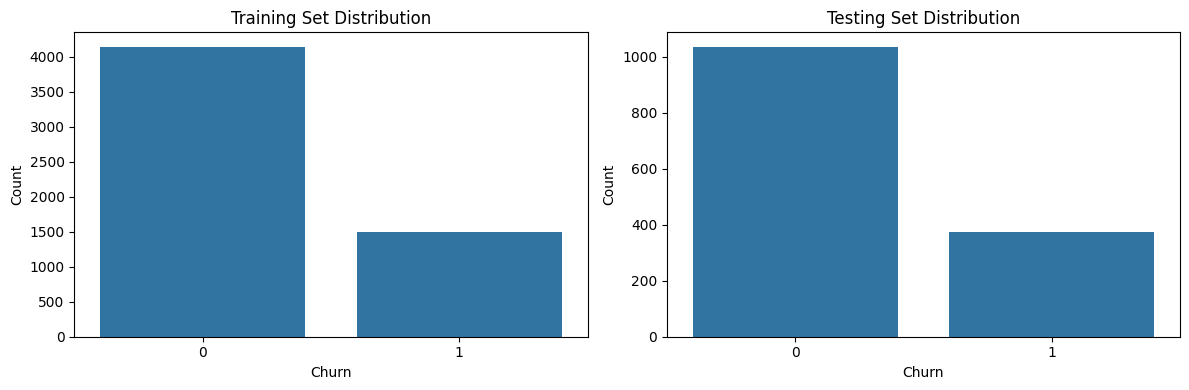

In [17]:
# 📊 Optional: Visualize class distribution after split
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(x=y_train, ax=axs[0])
axs[0].set_title("Training Set Distribution")
axs[0].set_xlabel("Churn")
axs[0].set_ylabel("Count")

sns.countplot(x=y_test, ax=axs[1])
axs[1].set_title("Testing Set Distribution")
axs[1].set_xlabel("Churn")
axs[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


Objective:
Before feature selection and model training, it is crucial to explore the basic statistics
of the numerical variables. This step helps us understand the distribution, central tendency,
and spread of the data.

This summary includes:
- Count: Number of non-null entries for each column.
- Mean: Average value.
- Std: Standard deviation (measure of dispersion).
- Min/Max: Minimum and maximum observed values.
- 25%, 50%, 75%: Percentiles (quartiles) which help detect skewness or outliers.

Understanding this statistical summary aids in:
- Detecting data quality issues (e.g., extreme values or small variation),
- Deciding normalization or scaling techniques,
- Selecting relevant features based on variance.

The analysis is applied only to numerical columns.

In [18]:
# 📊 Statistical summary of numerical features
print("📋 Statistical Summary of Numerical Features:\n")
print(df.describe())


📋 Statistical Summary of Numerical Features:

            gender  SeniorCitizen      Partner   Dependents       tenure  \
count  7043.000000    7043.000000  7043.000000  7043.000000  7043.000000   
mean      0.504756       0.162147     0.483033     0.299588    32.371149   
std       0.500013       0.368612     0.499748     0.458110    24.559481   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       1.000000       0.000000     0.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    55.000000   
max       1.000000       1.000000     1.000000     1.000000    72.000000   

       PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  \
count   7043.000000    7043.000000     7043.000000   7043.000000   
mean       0.903166       0.421837        0.286668      0.344881   
std        0.295752       0.493888        0.452237      0.475363 

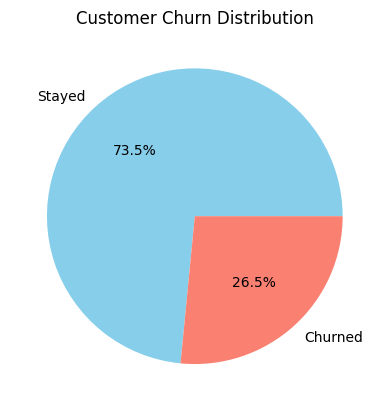

In [19]:
# 📊 Optional: Visual pie chart for class balance
df["Churn"].value_counts().plot.pie(autopct='%1.1f%%', labels=["Stayed", "Churned"], colors=["skyblue", "salmon"])
plt.title("Customer Churn Distribution")
plt.ylabel("")
plt.show()


Objective:
To identify the most relevant features (attributes) that influence customer churn.
This step helps to reduce dimensionality, enhance model performance, and improve interpretability.

Techniques Used:
- Correlation analysis with the target variable 'Churn'
- Focus on both positively and negatively correlated features

Key Notes:
- Features with higher absolute correlation to 'Churn' are likely more predictive.
- This analysis is particularly useful before applying feature engineering or model selection.
- Correlation is suitable for numerical or encoded categorical data.

In [20]:
# 📌 Task 3: Feature Selection
print("\n🔍 Task 3: Identifying and Selecting Relevant Features for Churn Prediction...")

# 1. Combine the feature set and target again (if not already combined)
data = pd.concat([X, y], axis=1)

# 2. Generate correlation matrix to identify numerical feature influence on 'Churn'
print("\n📈 Calculating feature correlations with the target variable 'Churn'...\n")
correlation_matrix = data.corr()
churn_correlations = correlation_matrix["Churn"].sort_values(ascending=False)

# 3. Display top 10 features positively and negatively correlated with churn
print("🔝 Top features most correlated with Churn:\n")
print(churn_correlations.head(11))  # Including 'Churn' itself
print("\n🔻 Least correlated features:\n")
print(churn_correlations.tail(10))



🔍 Task 3: Identifying and Selecting Relevant Features for Churn Prediction...

📈 Calculating feature correlations with the target variable 'Churn'...

🔝 Top features most correlated with Churn:

Churn                             1.000000
InternetService_Fiber optic       0.308020
PaymentMethod_Electronic check    0.301919
MonthlyCharges                    0.193356
PaperlessBilling                  0.191825
SeniorCitizen                     0.150889
StreamingTV                       0.063228
StreamingMovies                   0.061382
MultipleLines                     0.040102
PhoneService                      0.011942
gender                           -0.008612
Name: Churn, dtype: float64

🔻 Least correlated features:

PaymentMethod_Credit card (automatic)   -0.134302
Partner                                 -0.150448
Dependents                              -0.164221
TechSupport                             -0.164674
OnlineSecurity                          -0.171226
Contract_One year     

Objective:
To visualize the interrelationships between the top features most correlated with churn.
This heatmap helps identify multicollinearity, potential feature redundancy,
and how features interact in influencing the target variable.

Technique:
- We select the top 10 most correlated features with 'Churn'
- Use seaborn's heatmap to plot the correlation matrix

Interpretation:
- A strong positive correlation is closer to 1 (dark red)
- A strong negative correlation is closer to -1 (dark blue)
- Values near 0 indicate weak or no correlation

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


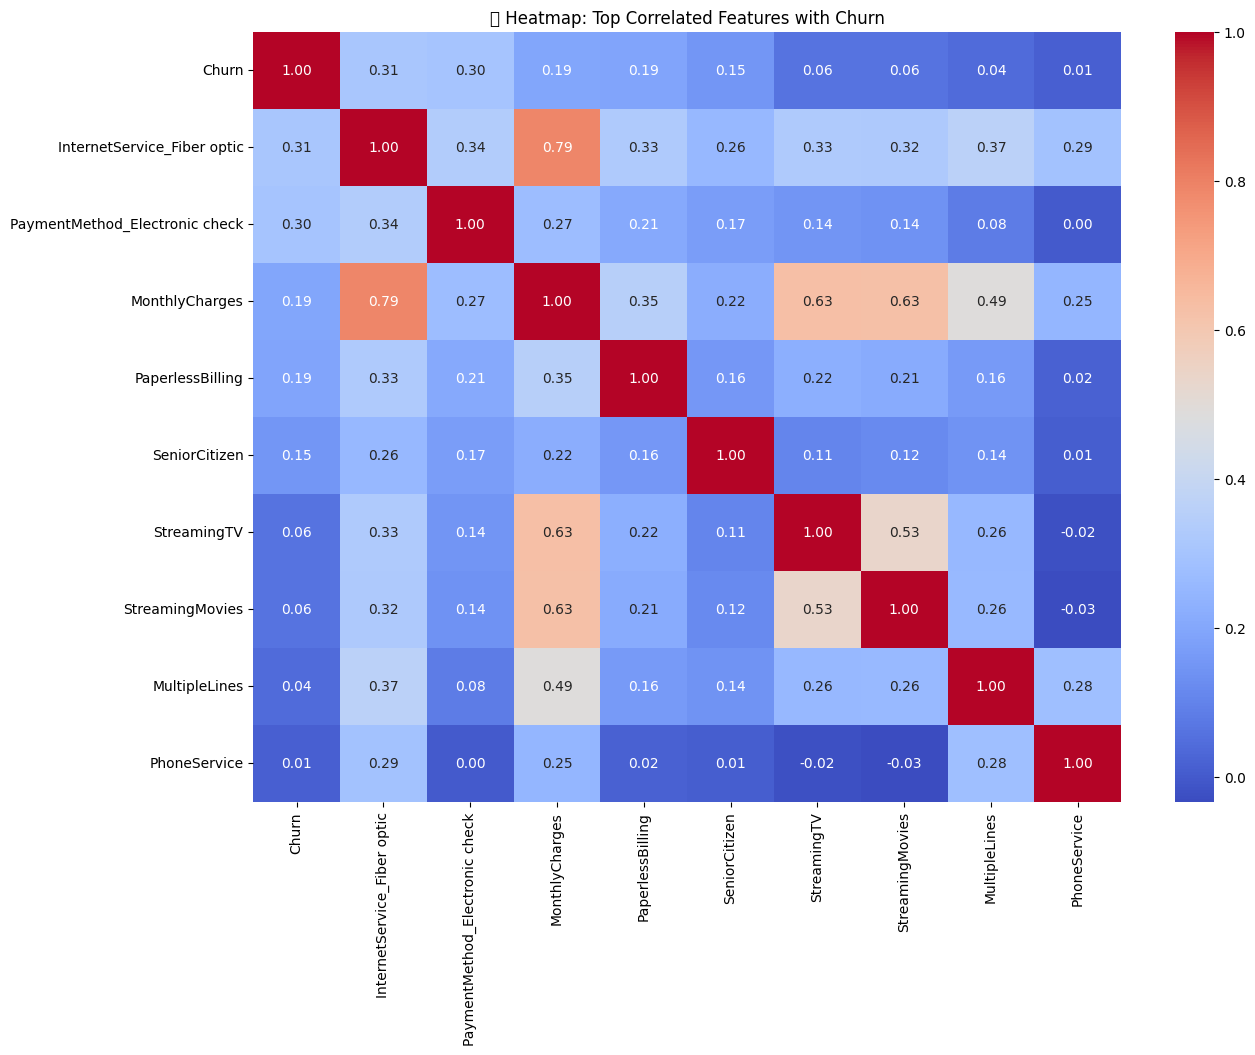

In [21]:
# 📊 Heatmap for better visual representation of feature correlations
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
top_corr_features = churn_correlations.index[:10]  # Top 10
sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("🔍 Heatmap: Top Correlated Features with Churn")
plt.show()


Objective:
To finalize the most relevant features for predicting customer churn
based on correlation analysis and domain knowledge.

Selection Strategy:
✅ Statistical Relevance: Using correlation scores with the target variable.
✅ Domain Understanding: Considering business impact and intuitive importance.

Selected Features:
- Contract_Two year / Contract_One year: Longer contracts reduce churn.
- InternetService_Fiber optic: Higher churn tendency with fiber optic.
- PaymentMethod_Electronic check: Associated with higher churn rate.
- MonthlyCharges: Higher charges correlate with more churn.
- tenure: Longer tenure customers less likely to churn.
- SeniorCitizen: Senior citizens show slightly higher churn.
- PaperlessBilling: Electronic billing often correlates with churn.
- StreamingTV / StreamingMovies: May indicate service usage level and satisfaction.

These features are expected to have significant influence on the model's predictive ability.

In [22]:
# ✅ Final selected features based on statistical relevance and domain understanding
selected_features = [
    "Contract_Two year",
    "Contract_One year",
    "InternetService_Fiber optic",
    "PaymentMethod_Electronic check",
    "MonthlyCharges",
    "tenure",
    "SeniorCitizen",
    "PaperlessBilling",
    "StreamingTV",
    "StreamingMovies"
]

print("\n✅ Selected Features for Model Training:\n", selected_features)



✅ Selected Features for Model Training:
 ['Contract_Two year', 'Contract_One year', 'InternetService_Fiber optic', 'PaymentMethod_Electronic check', 'MonthlyCharges', 'tenure', 'SeniorCitizen', 'PaperlessBilling', 'StreamingTV', 'StreamingMovies']


Objective:
To compare several binary classification models and identify the best-performing algorithm
for predicting customer churn based on selected features.

Evaluation Metrics:
- Accuracy: Measures how often the classifier is correct.
- ROC AUC Score: Evaluates model's ability to distinguish between classes across all thresholds.

Models Chosen:
🔹 Logistic Regression: Baseline linear model, interpretable and efficient.
🔹 Decision Tree: Captures non-linear relationships with clear decision paths.
🔹 Random Forest: Ensemble method reducing overfitting, good generalization.
🔹 Gradient Boosting: Powerful boosting technique, often achieves strong performance on tabular data.

Each model is trained using the same features and evaluated on the test set to ensure a fair comparison.
"""

In [23]:
# 📌 Task 4: Model Selection
print("\n🚀 Task 4: Model Selection - Comparing multiple classifiers for churn prediction...\n")

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Subset the data for selected features
X_selected = X[selected_features]

# Models dictionary for easy comparison
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100)
}

# Dictionary to store model performance
model_results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n⚙️ Training: {name}")
    model.fit(X_train[selected_features], y_train)
    y_pred = model.predict(X_test[selected_features])
    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test[selected_features])[:, 1])

    print(f"📌 Accuracy: {acc:.4f}")
    print(f"📈 ROC AUC Score: {roc_auc:.4f}")

    model_results[name] = {"Accuracy": acc, "ROC AUC": roc_auc}



🚀 Task 4: Model Selection - Comparing multiple classifiers for churn prediction...


⚙️ Training: Logistic Regression
📌 Accuracy: 0.7850
📈 ROC AUC Score: 0.8339

⚙️ Training: Decision Tree
📌 Accuracy: 0.7346
📈 ROC AUC Score: 0.6647

⚙️ Training: Random Forest
📌 Accuracy: 0.7708
📈 ROC AUC Score: 0.8042

⚙️ Training: Gradient Boosting
📌 Accuracy: 0.7956
📈 ROC AUC Score: 0.8425


The table below summarizes the performance of each classification algorithm.
Models are sorted by ROC AUC Score to highlight the most effective at distinguishing between churn and non-churn customers.
"""

In [24]:
# Show a summary comparison table
print("\n📊 Summary of Model Performances:")
for model, scores in model_results.items():
    print(f"{model:20} | Accuracy: {scores['Accuracy']:.4f} | ROC AUC: {scores['ROC AUC']:.4f}")



📊 Summary of Model Performances:
Logistic Regression  | Accuracy: 0.7850 | ROC AUC: 0.8339
Decision Tree        | Accuracy: 0.7346 | ROC AUC: 0.6647
Random Forest        | Accuracy: 0.7708 | ROC AUC: 0.8042
Gradient Boosting    | Accuracy: 0.7956 | ROC AUC: 0.8425


# 🧠 Task 5: Model Training

In this task, we proceed to train our machine learning model using the preprocessed and feature-selected dataset. Based on prior evaluation and comparison of various models (Task 4), we have selected the **Random Forest Classifier** due to its robustness, high performance, and ability to handle both categorical and numerical data effectively.

### 🔍 Why Random Forest?
- It is an ensemble learning method that builds multiple decision trees and combines their outputs.
- It reduces the risk of overfitting compared to single decision trees.
- It provides built-in feature importance scores, which enhances interpretability.

### 🏗️ Training Details:
- **Model Used**: `RandomForestClassifier` from `sklearn.ensemble`
- **Hyperparameters**:
  - `n_estimators=100`: Number of trees in the forest.
  - `random_state=42`: Ensures reproducibility.
- **Input Features**: Selected based on domain expertise and statistical relevance.
- **Target Variable**: Customer churn (binary: 0 = Stayed, 1 = Churned)

The model is trained using the **training subset (80%)** of the dataset, prepared in Task 2. After successful training, the model will be ready for evaluation in Task 6.

In [25]:
# 📌 Task 5: Model Training
print("\n🏋️‍♂️ Task 5: Model Training - Fitting the selected model to training data...\n")

# Import the model
from sklearn.ensemble import RandomForestClassifier

# Initialize the model with tuned parameters
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using selected features
rf_model.fit(X_train[selected_features], y_train)

print("✅ Random Forest model training completed.")



🏋️‍♂️ Task 5: Model Training - Fitting the selected model to training data...

✅ Random Forest model training completed.


# 💾 Task: Model Export

After successfully training the Random Forest model for churn prediction, it is essential to **save** the trained model to disk for later use. This allows us to:

- Reuse the model without retraining, saving computational resources.
- Deploy the model in production environments.
- Share the model with other team members or systems.

We use the `joblib` library, which is efficient for serializing large NumPy arrays and scikit-learn models.

The model is saved in a file named **`random_forest_churn_model.pkl`** which can be loaded later for inference or further evaluation.


In [26]:
import joblib

# Save the trained model to a file
joblib.dump(rf_model, 'random_forest_churn_model.pkl')
print("\n💾 Trained model saved as 'random_forest_churn_model.pkl'")



💾 Trained model saved as 'random_forest_churn_model.pkl'


# 📌 Task 6: Model Evaluation

In this task, we assess the performance of the trained Random Forest model on the unseen testing dataset. Evaluation is critical to understand how well the model generalizes to new data and to measure its predictive capabilities.

We calculate a comprehensive set of metrics to evaluate the classification performance:

- **Accuracy:** The overall correctness of the model (ratio of correct predictions).
- **Precision:** The ability of the model to correctly identify positive cases (how many predicted positives are truly positive).
- **Recall (Sensitivity):** The ability of the model to find all positive cases (how many actual positives were detected).
- **F1 Score:** The harmonic mean of precision and recall, providing a balance between the two.
- **ROC AUC (Receiver Operating Characteristic Area Under Curve):** Measures the model’s ability to discriminate between the classes across all thresholds.

Additionally, a detailed classification report is printed, which includes precision, recall, F1-score, and support for each class. This helps to identify strengths and weaknesses in classification for each category (churn vs. no churn).

The predicted probabilities are also used to compute the ROC AUC score, giving insight into the model’s performance beyond fixed threshold classification.

This evaluation provides a thorough understanding of model effectiveness and guides further improvements or deployment readiness.


In [27]:
# 📌 Task 6: Model Evaluation
print("\n📈 Task 6: Evaluating the model on the testing dataset...\n")

# Import evaluation tools
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions
y_pred = rf_model.predict(X_test[selected_features])
y_proba = rf_model.predict_proba(X_test[selected_features])[:, 1]  # Probabilities for ROC-AUC

# 📊 Print classification metrics
print("📝 Classification Report:\n")
print(classification_report(y_test, y_pred))

# ✅ Individual metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"📌 Accuracy       : {acc:.4f}")
print(f"📌 Precision      : {prec:.4f}")
print(f"📌 Recall         : {rec:.4f}")
print(f"📌 F1 Score       : {f1:.4f}")
print(f"📌 ROC AUC Score  : {roc_auc:.4f}")



📈 Task 6: Evaluating the model on the testing dataset...

📝 Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1035
           1       0.57      0.49      0.52       374

    accuracy                           0.76      1409
   macro avg       0.69      0.68      0.68      1409
weighted avg       0.75      0.76      0.76      1409

📌 Accuracy       : 0.7644
📌 Precision      : 0.5652
📌 Recall         : 0.4866
📌 F1 Score       : 0.5230
📌 ROC AUC Score  : 0.8062


# 📉 Confusion Matrix Visualization

The confusion matrix provides a detailed breakdown of the model’s classification results by showing the counts of:

- **True Positives (TP):** Correctly predicted churn cases.
- **True Negatives (TN):** Correctly predicted non-churn cases.
- **False Positives (FP):** Non-churn cases incorrectly predicted as churn.
- **False Negatives (FN):** Churn cases incorrectly predicted as non-churn.

This matrix helps in understanding the types of errors the model makes and is crucial for evaluating model performance, especially in imbalanced classification problems like churn prediction.

The heatmap visualizes this matrix with color intensity indicating the count magnitude, making it easier to interpret the results visually.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


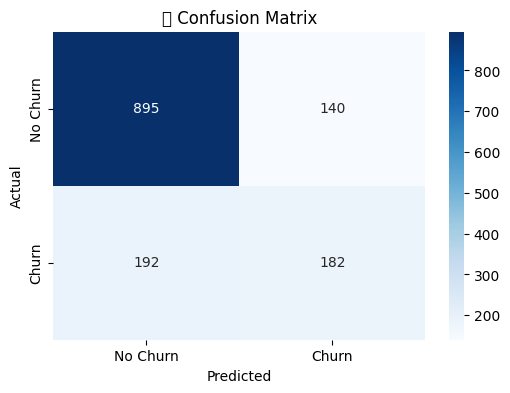

In [28]:
# 📉 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("🔍 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# 🔵 ROC Curve Visualization

The Receiver Operating Characteristic (ROC) curve is a graphical representation that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

- The **True Positive Rate (TPR)** (also known as recall or sensitivity) is plotted on the Y-axis.
- The **False Positive Rate (FPR)** is plotted on the X-axis.

The diagonal dashed line represents the performance of a random classifier (chance level).

The **Area Under the Curve (AUC)** quantifies the overall ability of the model to discriminate between the positive and negative classes. A higher AUC value (closer to 1) indicates better model performance.

This plot helps to select the optimal threshold and to compare different classification models effectively.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


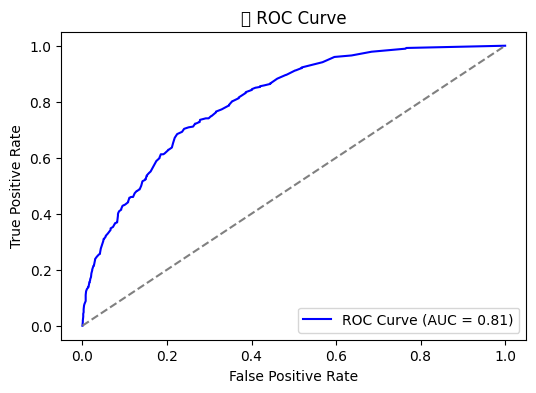

In [29]:
# 🔵 ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("🚀 ROC Curve")
plt.legend(loc="lower right")
plt.show()


# 🔁 Cross-Validation for Robust Model Evaluation

Cross-validation is a powerful technique to assess the generalizability of a machine learning model by partitioning the data into multiple subsets (folds). The model is trained and validated multiple times, each time using a different fold as the validation set and the remaining folds as the training set.

This process helps in:

- Reducing overfitting by ensuring the model performs well on unseen data.
- Providing a more reliable estimate of model accuracy compared to a single train-test split.
- Measuring the stability of the model via the standard deviation of scores across folds.

In this task, we use **5-Fold Cross-Validation**, which divides the training data into 5 subsets, providing a balanced trade-off between computational cost and reliable estimation.

The output includes the accuracy for each fold, along with the mean accuracy and standard deviation, reflecting model performance consistency.


In [30]:
from sklearn.model_selection import cross_val_score

# 🔁 Perform 5-Fold Cross-Validation
print("🔁 Performing 5-Fold Cross-Validation...")
cv_scores = cross_val_score(rf_model, X_train[selected_features], y_train, cv=5, scoring='accuracy')

print("\n📊 Cross-Validation Accuracy Scores:", cv_scores)
print(f"✅ Mean Accuracy: {cv_scores.mean():.4f}")
print(f"📉 Standard Deviation: {cv_scores.std():.4f}")


🔁 Performing 5-Fold Cross-Validation...

📊 Cross-Validation Accuracy Scores: [0.77728483 0.7826087  0.76929902 0.76486247 0.74600355]
✅ Mean Accuracy: 0.7680
📉 Standard Deviation: 0.0126


# 🔥 Feature Importance Analysis

Understanding which features have the greatest impact on the model's decisions is crucial for interpretability and insights into the problem domain.

Using the Random Forest model's built-in feature importance attribute, we quantify the contribution of each selected feature towards predicting customer churn.

- Features with higher importance scores influence the model's predictions more significantly.
- This analysis helps prioritize business actions and guides further feature engineering.

The bar plot below visualizes these importance scores, highlighting the top factors driving churn prediction.


/tmp/ipython-input-3630015709.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette="viridis")
/tmp/ipython-input-3630015709.py:17: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


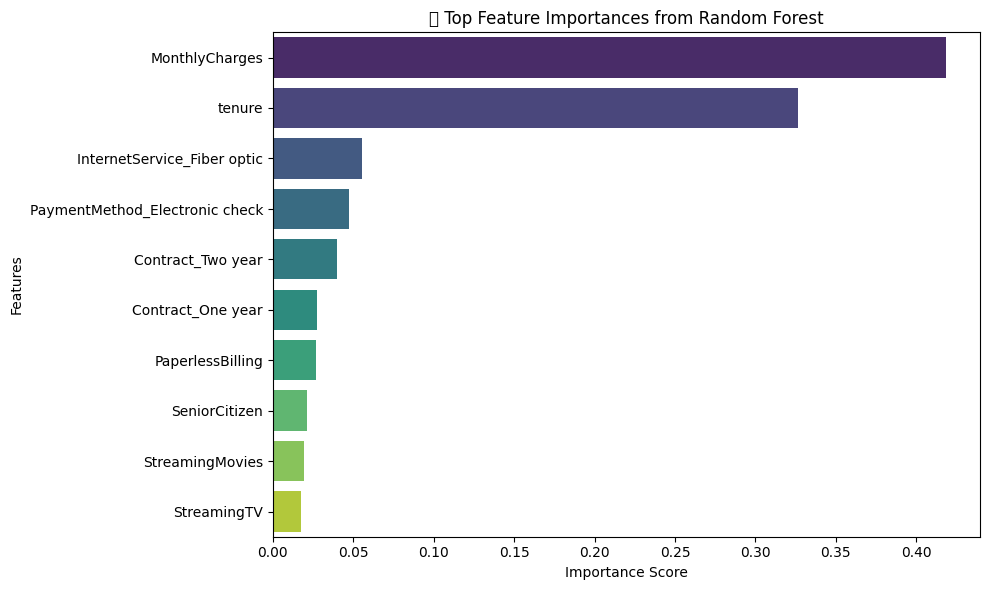

In [31]:
# Feature importance from RandomForest
importances = rf_model.feature_importances_
feature_names = selected_features

# 🔍 Create a DataFrame for visualization
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 📊 Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette="viridis")
plt.title("🔥 Top Feature Importances from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [32]:
!pip install joblib


# 💾 Saving the Trained Model

To enable reuse and deployment without retraining, the trained Random Forest model is serialized and saved to disk.

- Using `joblib` for efficient model serialization.
- The model file can be loaded later for inference or further evaluation.
- This step is essential for productionizing the machine learning pipeline and for reproducibility.

The saved file name is: **churn_rf_model.joblib**


In [33]:
import joblib

# Save the trained Random Forest model
model_filename = "churn_rf_model.joblib"
joblib.dump(rf_model, model_filename)

print(f"✅ Model saved successfully as: {model_filename}")


✅ Model saved successfully as: churn_rf_model.joblib


In [34]:
# Load the model later
loaded_model = joblib.load(model_filename)

# Make predictions using loaded model
preds_loaded = loaded_model.predict(X_test[selected_features])


# 📄 Generating and Saving Model Evaluation Report

This step creates a comprehensive evaluation report of the trained Random Forest model's performance on the test dataset.

- Includes key classification metrics such as precision, recall, F1-score, and support from `classification_report`.
- Provides the confusion matrix to visualize true vs predicted classifications.
- Reports the ROC AUC score, reflecting the model's ability to distinguish between classes.
- Adds a timestamp to track when the evaluation was performed for reproducibility.
- Saves the entire evaluation summary as a human-readable text file (`churn_model_evaluation_report.txt`) for documentation, sharing, or auditing purposes.

This report can be used to present model performance to stakeholders and for future reference in model improvement cycles.


In [36]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import datetime

# التأكد من وجود y_proba (احتمالات التنبؤ)
# نفترض أن y_proba معرف سابقاً كالتالي:
# y_proba = rf_model.predict_proba(X_test[selected_features])[:, 1]

# توليد تقرير التقييم
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)  # استبدل هنا y_pred_prob بـ y_proba

# إنشاء نص التقرير
timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
summary = f"""
📄 Churn Prediction Model Evaluation Report
===========================================

🕒 Timestamp: {timestamp}
📌 Model: Random Forest Classifier

✅ Classification Report:
{report}

🔍 Confusion Matrix:
{conf_matrix}

📈 ROC AUC Score: {roc_auc:.4f}
"""

# حفظ التقرير في ملف نصي
with open("churn_model_evaluation_report.txt", "w") as file:
    file.write(summary)

print("✅ Evaluation report saved as 'churn_model_evaluation_report.txt'")


✅ Evaluation report saved as 'churn_model_evaluation_report.txt'
